In [102]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pylab as plt
import matplotlib.axes as axes
import matplotlib.font_manager
import matplotlib.axis as axis
from matplotlib import rc, rcParams

Task 1

In [2]:
def read_gff(filename):
    return pd.read_csv(filename, sep = "\t", comment="#", names=[
                "chromosome",
                "source",
                "type",
                "start",
                "end",
                "score",
                "strand",
                "phase",
                "attributes"])



In [3]:
#reading gff
df = read_gff("/Users/ekaterinagrigorieva/Downloads/rrna_annotation.gff")
df

,chromosome,source,type,start,end,score,strand,phase,attributes
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.000000e+00,+,.,Name=16S_rRNA;product=16S ribosomal RNA
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.000000e+00,+,.,Name=23S_rRNA;product=23S ribosomal RNA
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.000000e+00,+,.,Name=16S_rRNA;product=16S ribosomal RNA
3,Reference_10,barrnap:0.9,rRNA,471166,474246,0.000000e+00,+,.,Name=23S_rRNA;product=23S ribosomal RNA
4,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.000000e+00,-,.,Name=23S_rRNA;product=23S ribosomal RNA
...,...,...,...,...,...,...,...,...,...
343,Reference_25,barrnap:0.9,rRNA,1819878,1822785,0.000000e+00,+,.,Name=23S_rRNA;product=23S ribosomal RNA
344,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,Name=5S_rRNA;product=5S ribosomal RNA
345,Reference_25,barrnap:0.9,rRNA,3744056,3744159,2.900000e-10,-,.,Name=5S_rRNA;product=5S ribosomal RNA
346,Reference_25,barrnap:0.9,rRNA,3744287,3747194,0.000000e+00,-,.,Name=23S_rRNA;product=23S ribosomal RNA


In [4]:
#removing unwanted info from attributes
df['attributes'] = df['attributes'].map(lambda x: x.lstrip('Name=').rstrip('ribosomal RNA').replace("_rRNA;product=", ""))
df['attributes'] = df['attributes'].map(lambda x: x[:len(x)//2])
df

,chromosome,source,type,start,end,score,strand,phase,attributes
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.000000e+00,+,.,16S
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.000000e+00,+,.,23S
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.000000e+00,+,.,16S
3,Reference_10,barrnap:0.9,rRNA,471166,474246,0.000000e+00,+,.,23S
4,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.000000e+00,-,.,23S
...,...,...,...,...,...,...,...,...,...
343,Reference_25,barrnap:0.9,rRNA,1819878,1822785,0.000000e+00,+,.,23S
344,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,5S
345,Reference_25,barrnap:0.9,rRNA,3744056,3744159,2.900000e-10,-,.,5S
346,Reference_25,barrnap:0.9,rRNA,3744287,3747194,0.000000e+00,-,.,23S


In [5]:
#creating df for barplot
df_types = pd.DataFrame(data = np.array(list(df['chromosome'].unique())*3), columns=["sequence"])
df_types["RNA type"] =  ["16S"]*26 + ["23S"]*26 + ["5S"]*26
df_types["count"] = 0
df_types = df_types.sort_values("sequence").reset_index(drop = True)
for i in range(len(df_types['sequence'])):
    df_types.iloc[i, 2] += len(df[(df["attributes"] == df_types.iloc[i, 1])&(df["chromosome"] == df_types.iloc[i, 0])])
df_types 
    

,sequence,RNA type,count
0,Reference_1,23S,2
1,Reference_1,16S,2
2,Reference_1,5S,2
3,Reference_10,5S,0
4,Reference_10,23S,5
...,...,...,...
73,Reference_8,23S,2
74,Reference_8,5S,0
75,Reference_9,16S,6
76,Reference_9,23S,6


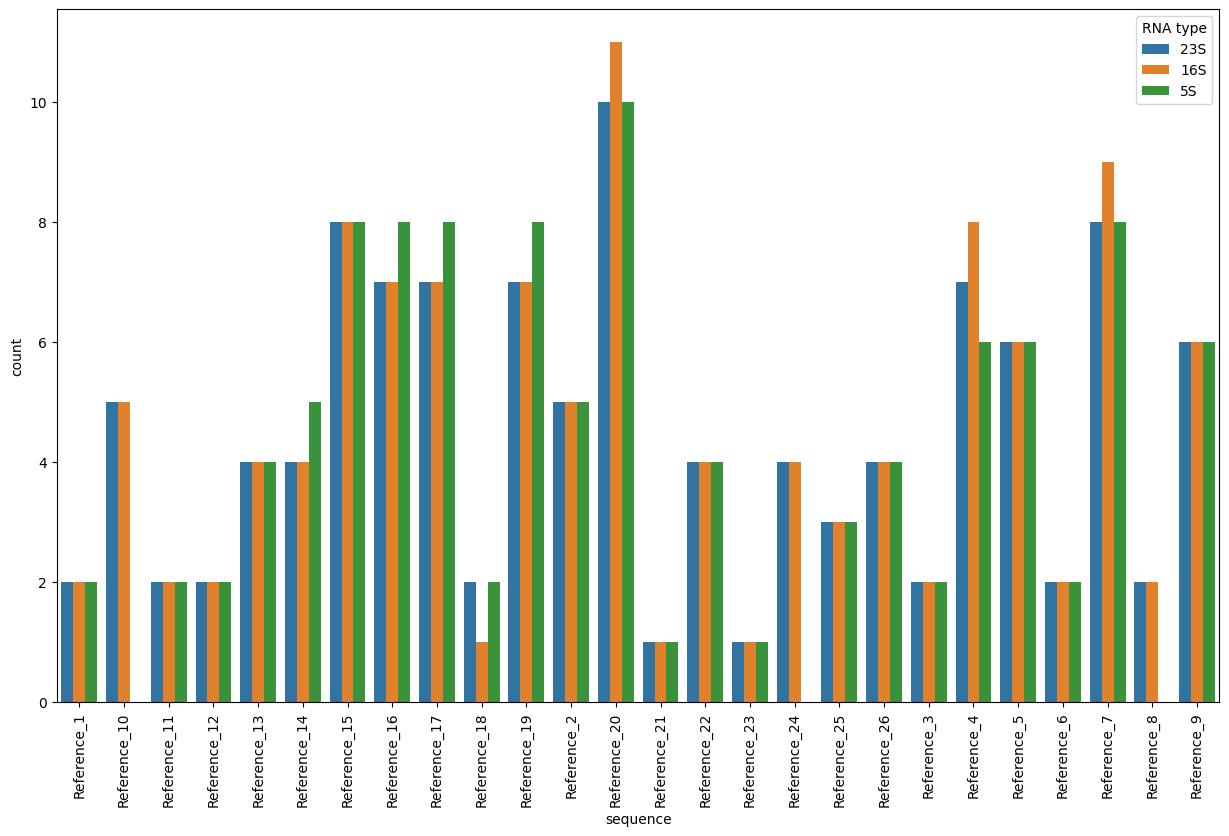

In [6]:
#barplot
plt.figure(figsize = (15, 9))
sns.barplot(data=df_types, x = "sequence", y = "count", hue = "RNA type")
plt.xticks(rotation=90)
plt.show()

In [7]:
def read_bed6(filename):
    return pd.read_csv(filename, sep = "\t", names=[
                "chromosome",
                "start",
                "end",
                "name",
                "score",
                "strand"])



In [8]:
df_contigs = read_bed6("/Users/ekaterinagrigorieva/Downloads/alignment.bed")
df_contigs

,chromosome,start,end,name,score,strand
0,Reference_1,197681,200286,NODE_1445_length_2603_cov_1135.593799,41,-
1,Reference_1,202886,202996,NODE_19543_length_110_cov_1549.290909,0,-
2,Reference_1,202941,203377,NODE_5666_length_436_cov_418.653543,16,+
3,Reference_1,203322,785222,NODE_25_length_581906_cov_146.024228,60,+
4,Reference_1,785169,1763981,NODE_11_length_978812_cov_132.517515,60,-
...,...,...,...,...,...,...
7705,Reference_26,5532432,5535601,NODE_1329_length_3169_cov_103.935132,5,+
7706,Reference_26,5535546,5535722,NODE_19238_length_176_cov_67.305785,0,+
7707,Reference_26,5535667,5537226,NODE_2001_length_1559_cov_98.029920,0,+
7708,Reference_26,5537171,5537343,NODE_19245_length_172_cov_84.367521,0,+


In [9]:
#changed names of columns
df.rename(columns={'start': 'start_x', 'end': 'end_x', 'score': 'score_x', 'strand': 'strand_x'}, inplace=True)
df

,chromosome,source,type,start_x,end_x,score_x,strand_x,phase,attributes
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.000000e+00,+,.,16S
1,Reference_10,barrnap:0.9,rRNA,68981,72061,0.000000e+00,+,.,23S
2,Reference_10,barrnap:0.9,rRNA,469298,470826,0.000000e+00,+,.,16S
3,Reference_10,barrnap:0.9,rRNA,471166,474246,0.000000e+00,+,.,23S
4,Reference_10,barrnap:0.9,rRNA,3629599,3632680,0.000000e+00,-,.,23S
...,...,...,...,...,...,...,...,...,...
343,Reference_25,barrnap:0.9,rRNA,1819878,1822785,0.000000e+00,+,.,23S
344,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,5S
345,Reference_25,barrnap:0.9,rRNA,3744056,3744159,2.900000e-10,-,.,5S
346,Reference_25,barrnap:0.9,rRNA,3744287,3747194,0.000000e+00,-,.,23S


In [10]:
#changed names of columns
df_contigs.rename(columns={'start': 'start_y', 'end': 'end_y', 'score': 'score_y', 'strand': 'strand_y', 'name': 'contigs'}, inplace=True)
df_contigs

,chromosome,start_y,end_y,contigs,score_y,strand_y
0,Reference_1,197681,200286,NODE_1445_length_2603_cov_1135.593799,41,-
1,Reference_1,202886,202996,NODE_19543_length_110_cov_1549.290909,0,-
2,Reference_1,202941,203377,NODE_5666_length_436_cov_418.653543,16,+
3,Reference_1,203322,785222,NODE_25_length_581906_cov_146.024228,60,+
4,Reference_1,785169,1763981,NODE_11_length_978812_cov_132.517515,60,-
...,...,...,...,...,...,...
7705,Reference_26,5532432,5535601,NODE_1329_length_3169_cov_103.935132,5,+
7706,Reference_26,5535546,5535722,NODE_19238_length_176_cov_67.305785,0,+
7707,Reference_26,5535667,5537226,NODE_2001_length_1559_cov_98.029920,0,+
7708,Reference_26,5537171,5537343,NODE_19245_length_172_cov_84.367521,0,+


In [11]:
#merging tables gives us all possible variants
df_intersect = df.merge(df_contigs, left_on='chromosome', right_on='chromosome')
df_intersect

,chromosome,source,type,start_x,end_x,score_x,strand_x,phase,attributes,start_y,end_y,contigs,score_y,strand_y
0,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,16S,67964,68037,NODE_19846_length_73_cov_334.777778,0,+
1,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,16S,512498,512739,NODE_13330_length_244_cov_1.195767,4,-
2,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,16S,1940123,1940316,NODE_15898_length_227_cov_0.959302,0,-
3,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,16S,2959910,2960140,NODE_14270_length_237_cov_1.565934,60,+
4,Reference_10,barrnap:0.9,rRNA,67122,68652,0.0,+,.,16S,3422064,3422561,NODE_4494_length_558_cov_1.447316,60,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126743,Reference_25,barrnap:0.9,rRNA,3747656,3749126,0.0,-,.,16S,3749069,3749300,NODE_15186_length_231_cov_783.727273,0,-
126744,Reference_25,barrnap:0.9,rRNA,3747656,3749126,0.0,-,.,16S,3749245,3749677,NODE_5718_length_432_cov_495.000000,31,-
126745,Reference_25,barrnap:0.9,rRNA,3747656,3749126,0.0,-,.,16S,3749622,3759983,NODE_952_length_10361_cov_185.048709,60,+
126746,Reference_25,barrnap:0.9,rRNA,3747656,3749126,0.0,-,.,16S,3759928,3761392,NODE_2106_length_1464_cov_409.744500,0,-


In [12]:
#sorting
df_intersect = df_intersect.query('start_x > start_y and end_x < end_y').drop_duplicates("start_x")
df_intersect

,chromosome,source,type,start_x,end_x,score_x,strand_x,phase,attributes,start_y,end_y,contigs,score_y,strand_y
129,Reference_11,barrnap:0.9,rRNA,924358,925855,0.000000e+00,+,.,16S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
156,Reference_11,barrnap:0.9,rRNA,926697,929642,0.000000e+00,+,.,23S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
183,Reference_11,barrnap:0.9,rRNA,929827,929936,1.400000e-12,+,.,5S,923529,930070,NODE_1081_length_6540_cov_836.773323,0,-
215,Reference_11,barrnap:0.9,rRNA,2074460,2075957,0.000000e+00,+,.,16S,2073631,2080172,NODE_1081_length_6540_cov_836.773323,0,-
242,Reference_11,barrnap:0.9,rRNA,2076799,2079744,0.000000e+00,+,.,23S,2073631,2080172,NODE_1081_length_6540_cov_836.773323,0,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121855,Reference_14,barrnap:0.9,rRNA,2433040,2433152,2.000000e-12,-,.,5S,2433027,2433434,NODE_6108_length_407_cov_1153.232955,0,+
122182,Reference_14,barrnap:0.9,rRNA,3766952,3767064,2.000000e-12,-,.,5S,3766939,3767346,NODE_6108_length_407_cov_1153.232955,0,+
122583,Reference_25,barrnap:0.9,rRNA,1329370,1329473,2.900000e-10,-,.,5S,1329345,1329810,NODE_5333_length_465_cov_547.609756,0,-
125060,Reference_25,barrnap:0.9,rRNA,1822913,1823016,2.900000e-10,+,.,5S,1822575,1823040,NODE_5333_length_465_cov_547.609756,0,+


Task 2

In [13]:
df_diff = pd.read_csv("/Users/ekaterinagrigorieva/Downloads/diffexpr_data.tsv.gz", sep = '\t')

In [14]:
df_diff

,Sample,logFC,pval,pval_corr,log_pval
0,PNLIP,10.092524,6.590327e-01,1.000000e+00,-0.000000
1,CELA2A,8.691414,5.823905e-01,1.000000e+00,-0.000000
2,CLPS,8.054078,6.517331e-01,1.000000e+00,-0.000000
3,MPO,7.817773,4.483336e-01,1.000000e+00,-0.000000
4,AMY2A,7.285231,6.324412e-01,1.000000e+00,-0.000000
...,...,...,...,...,...
20525,SLC12A1,-7.834589,4.993254e-58,1.025115e-53,52.989227
20526,SEMG2,-8.651953,3.989840e-04,1.000000e+00,-0.000000
20527,MUC7,-9.196481,3.281804e-07,6.737544e-03,2.171498
20528,SEMG1,-9.313028,3.880575e-04,1.000000e+00,-0.000000


In [15]:
print(min(df_diff["logFC"]), max(df_diff["logFC"]), min(df_diff["log_pval"]), max(df_diff["log_pval"]))

-10.661092815248146 10.092524279930334 -0.0 113.44220378531077


In [16]:
df_diff.loc[(df_diff['logFC'] > 0) & (df_diff['log_pval'] < -np.log10(0.05)), 'DEG'] = 'Non-significally upregulated'
df_diff.loc[(df_diff['logFC'] < 0) & (df_diff['log_pval'] < -np.log10(0.05)), 'DEG'] = 'Non-significally downregulated'
df_diff.loc[(df_diff['logFC'] > 0) & (df_diff['log_pval'] > -np.log10(0.05)), 'DEG'] = 'Significally upregulated'
df_diff.loc[(df_diff['logFC'] < 0) & (df_diff['log_pval'] > -np.log10(0.05)), 'DEG'] = 'Significally downregulated'
df_diff = df_diff.sort_values("log_pval", ascending=False)

In [17]:
top2_up = df_diff.loc[(df_diff['DEG'] == 'Significally upregulated')].sort_values('logFC', ascending=False)[0:2]
top2_up

,Sample,logFC,pval,pval_corr,log_pval,DEG
64,ZIC2,4.571915,4.096640e-08,0.000841,3.075183,Significally upregulated
88,ZIC5,4.276745,3.686245e-09,0.000076,4.121027,Significally upregulated


In [18]:
top2_down = df_diff.loc[(df_diff['DEG'] == 'Significally downregulated')].sort_values('logFC', ascending=True)[0:2]
top2_down

,Sample,logFC,pval,pval_corr,log_pval,DEG
20529,UMOD,-10.661093,3.717350e-57,7.631720e-53,52.117378,Significally downregulated
20527,MUC7,-9.196481,3.281804e-07,6.737544e-03,2.171498,Significally downregulated


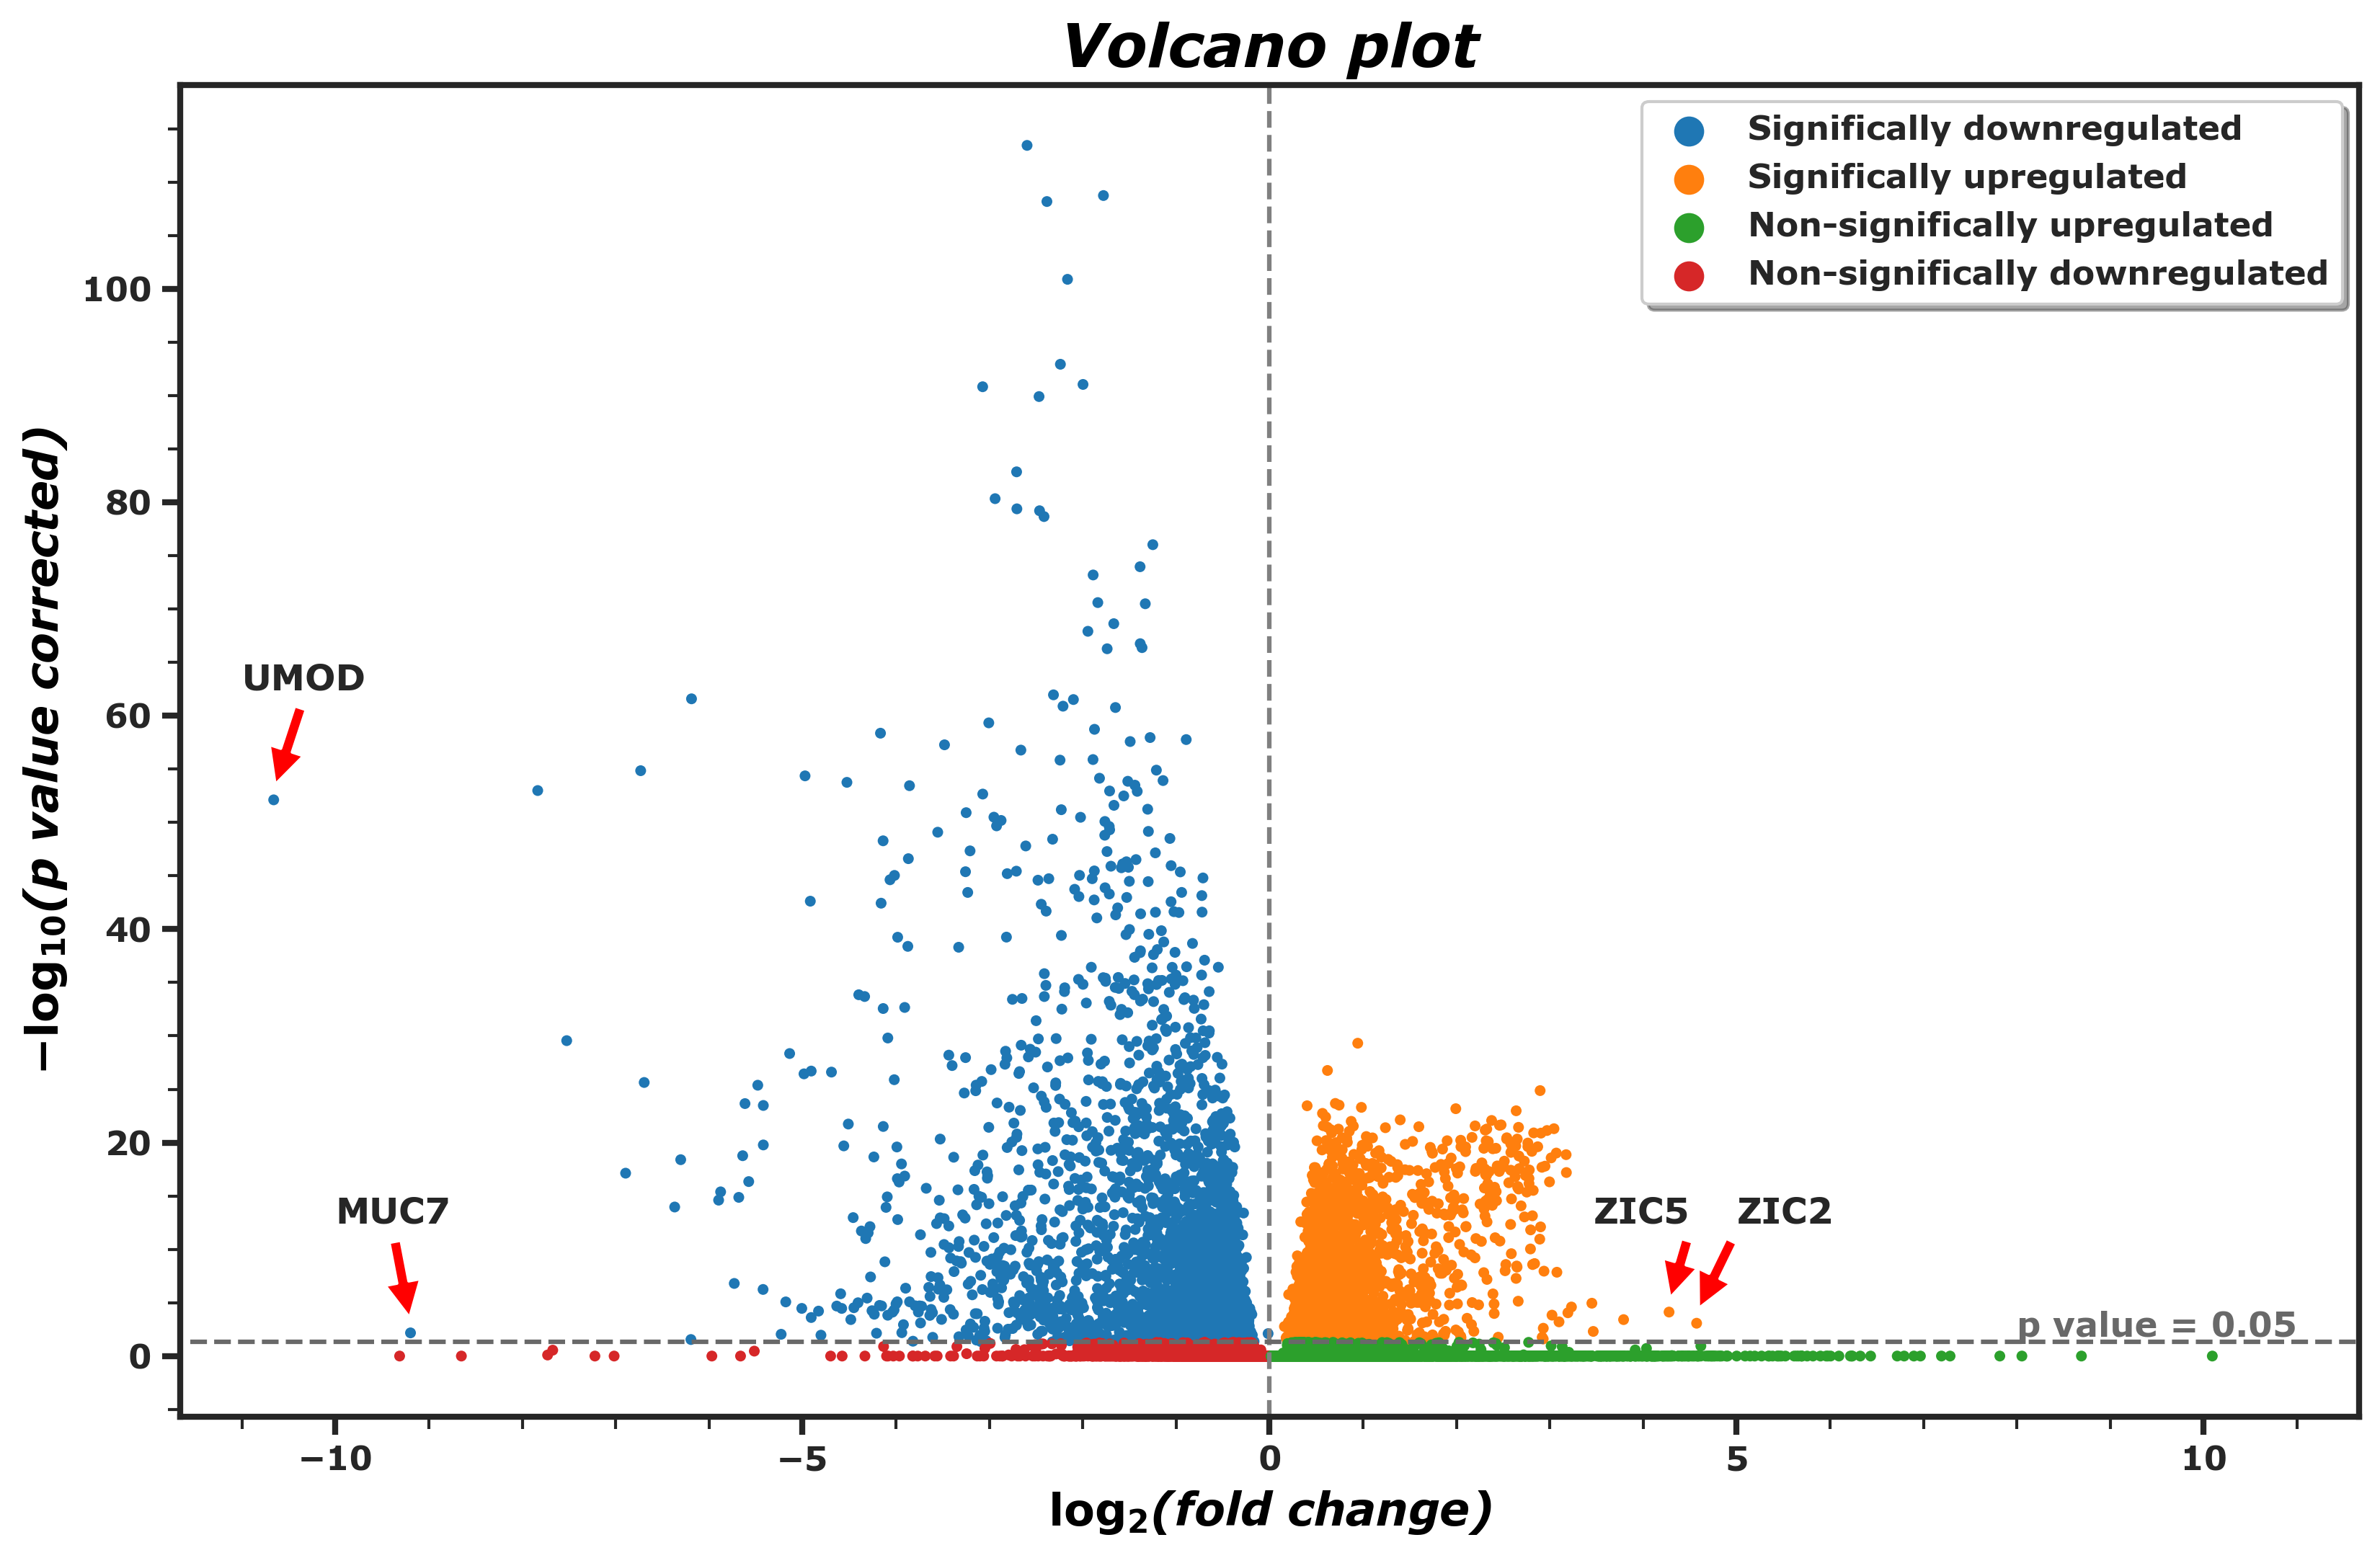

In [107]:
plt.figure(figsize=(13,8), dpi = 300, linewidth = 0)
sns.set(font="Verdana", style = 'ticks')
rc('font', weight='bold')
matplotlib.font_manager.FontManager(weight='bold')
plt.axvline(0, 0,200, lw = 1.5, linestyle = "dashed", c = "grey")
plt.axhline(-np.log10(0.05), -20,20, lw = 1.5, linestyle = "dashed", c = "dimgrey")
plt.text(8, -np.log10(0.05)+0.5, "p value = 0.05", weight = 'bold', c = 'dimgrey', size = 11.5)
plt.xlabel(r'$\bf{log_{2}}$' + '(fold change)', weight = 'bold', style = 'italic', c = 'black', size = 15)
plt.ylabel(r'$\bf{-log_{10}}$' + '(p value corrected)', weight = 'bold', style = 'italic', size = 15, c = 'black')
plt.title('Volcano plot', weight = 'bold', style = 'italic', size = 20, c = 'black')
plt.xlim(min(df_diff["logFC"])-1, min(df_diff["logFC"])*(-1)+1)
fig = sns.scatterplot(data=df_diff, x="logFC", y="log_pval", hue = "DEG", s = 13, linewidth=0, palette = "tab10")
fig.axes.minorticks_on()
fig.axes.tick_params(axis='both', which = 'major', width = 2)
fig.axes.spines['bottom'].set_linewidth(2)
fig.axes.spines['left'].set_linewidth(2)
fig.axes.spines['right'].set_linewidth(2)
fig.axes.spines['top'].set_linewidth(2)
fig.axes.annotate('UMOD', (-10.661093, 53.117378), xycoords='data',
            xytext=(-11, 65), arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')
fig.axes.annotate('ZIC2', (4.571915, 4.075183), xycoords='data',
            xytext=(5, 15), arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')
fig.axes.annotate('MUC7', (-9.196481, 3.171498), xycoords='data',
            xytext=(-10, 15), arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='left', verticalalignment='top')
fig.axes.annotate('ZIC5', (4.2767451, 5.121027), xycoords='data',
            xytext=(4.5, 15), arrowprops=dict(facecolor='red', shrink=0.05),
            horizontalalignment='right', verticalalignment='top')
handles, labels = fig.axes.get_legend_handles_labels()
fig.axes.legend(handles=handles[0:], labels=labels[0:], shadow = True, markerscale=1.5, prop = {'weight':'bold'})